# Safe Neighborhoods in Pittsburgh

### By: Ammar Al-abboodi, Zipan Huang, Maggie Lin

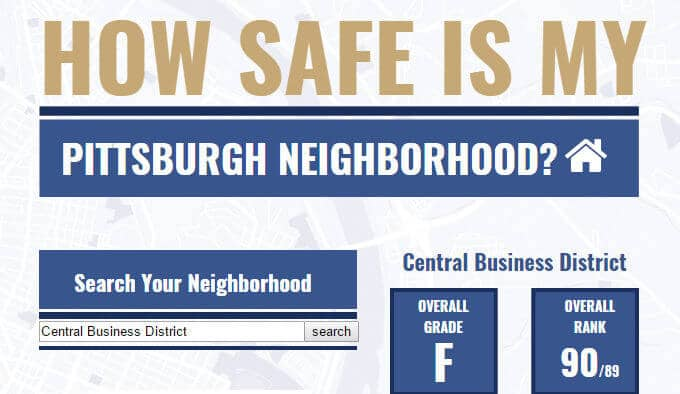

In [1]:
import requests
from IPython.display import Image

image_url = "https://www.drkattorneys.com/wp-content/uploads/2017/04/pittsburgh-safety-1.jpg"
Image(requests.get(image_url).content)

Pittsburgh, Pennsylvania is a vibrant and diverse city with many different neighborhoods to explore. When looking to move to a new area, one of the most important factors to consider is safety. Fortunately, there are several ways to assess the safety of a neighborhood in Pittsburgh. One way is to look at the number of fire incidents that occur in the area. Another is to examine the number of non-traffic citations issued in the area. Lastly, looking at the arrest rates in the neighborhood can also provide valuable information. By analyzing these three factors, it is possible to get a better sense of which neighborhoods in Pittsburgh are the safest and most secure places to call home.

# Arrests 
#### Frequencey of Arrestes in neighborhoods around pittsburgh

The arrest rate in Pittsburgh, Pennsylvania varies depending on a variety of factors, including the time period being analyzed and the type of crime being committed. According to recent statistics, the overall arrest rate in Pittsburgh is slightly higher than the national average, with approximately 3.5 arrests per 1,000 residents. However, it's important to note that this rate can vary significantly depending on the specific neighborhood or area of the city being analyzed. Certain neighborhoods may have higher rates of arrests due to higher levels of crime or more intensive policing efforts, while others may have lower rates due to a lower incidence of criminal activity. Overall, the arrest rate in Pittsburgh is an important metric for understanding the level of criminal activity and law enforcement efforts in the city.

This data contains the boundaries of all Pittsbrugh neighborhoods

In [43]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd

neighborhoods = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pit")
neighborhoods.head(3)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."


Here's the neighborhood dataset contains all the arrested event.

In [44]:
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
arrests.head(3)


,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625


To tally the number of arrest events in each neighborhood, I utilized a dictionary

In [45]:

dic = {}

# iterating through the elements of list
for i in neighborhoods["hood"]:
    dic[i] = 0
    
for index, row in arrests.iterrows():
    arrests_neighborhood =  row["INCIDENTNEIGHBORHOOD"]
    if arrests_neighborhood in dic:
        dic[arrests_neighborhood] += 1


Here's the table of arrests count

In [46]:
df = pd.DataFrame.from_dict(dic, orient="index", columns = ["Arrests"])
display(df)

,Arrests
Point Breeze North,261
Squirrel Hill North,273
Garfield,662
Bedford Dwellings,619
Knoxville,1244
...,...
Regent Square,35
Terrace Village,272
Elliott,622
South Side Flats,3195


Here's the bar chart of arrest events in each neighborhood

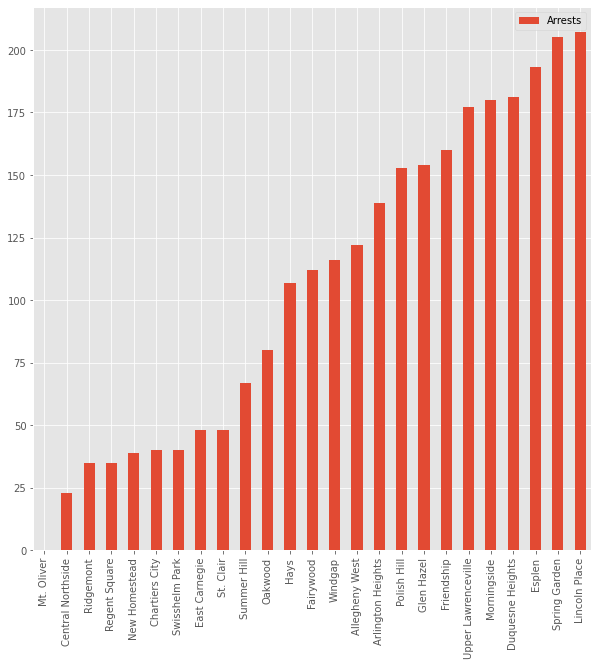

In [47]:
df = df.sort_values("Arrests", ascending=True)
df.iloc[:25].plot(kind = "bar", figsize = (10, 10))

Here's the pie chart of all neighborhoods

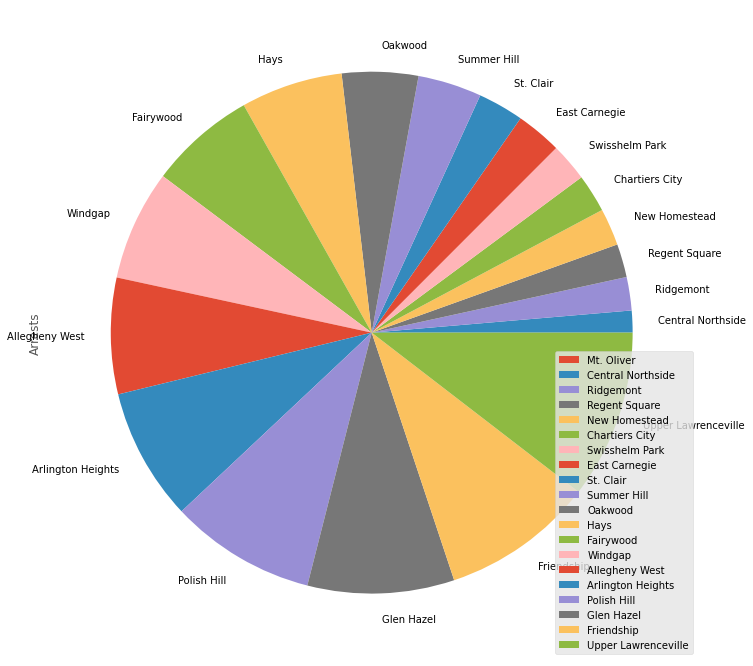

In [48]:
df.iloc[:20].plot.pie(y='Arrests', figsize=(12, 12))

The neighborhood map indicates that the areas marked in yellow and green have the highest incidence of arrests.

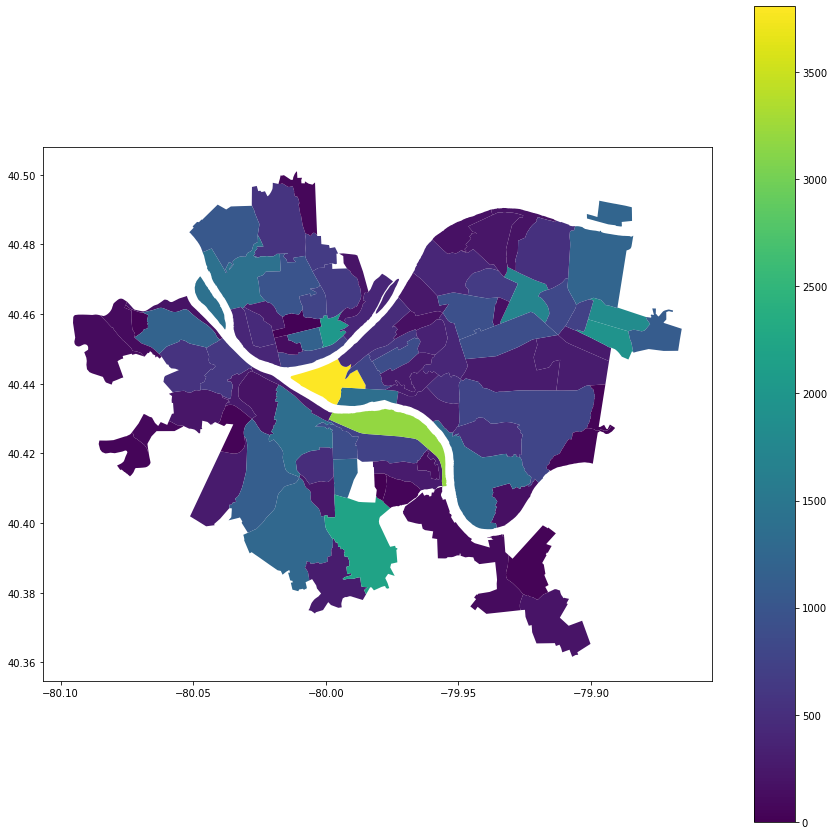

In [8]:
neighborhoods["Arrests"] = dic.values()
neighborhoods.plot(column="Arrests", legend=True, figsize = (15, 15))

# Traffic Stops
#### Data of Traffic stops around Allegheny neighborhoods

A non-traffic citation is a legal citation issued for a violation of a law or ordinance that is not related to traffic or vehicles. These citations can be issued for a wide range of offenses, such as littering, noise violations, public intoxication, and other non-traffic related offenses. Non-traffic citations are typically handled in a different manner than traffic citations, as they do not involve moving violations and may be considered less severe in nature. In some cases, a non-traffic citation may require the violator to pay a fine or appear in court to contest the citation. However, the consequences of a non-traffic citation may vary depending on the specific offense and the jurisdiction in which it occurred.

This is the non-traffic citations dataset in Pittsburgh neighborhoods

In [36]:
neighborhood = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
File = "https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86"
data = pd.read_csv(File)
data.head(5)

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403


In [37]:
pd.DataFrame(data["NEIGHBORHOOD"])

,NEIGHBORHOOD
0,North Oakland
1,North Oakland
2,Allegheny Center
3,Homewood South
4,Upper Lawrenceville
...,...
14500,Central Business District
14501,Central Business District
14502,Central Business District
14503,Central Business District


To store the total number of non-traffic events that occurred in each neighborhood, I employed a dictionary

In [38]:
dic = {}

for i in neighborhood["hood"]:
    dic[i] = 0
    
for index,row in data.iterrows():
    neighborhood = row['NEIGHBORHOOD']
    
    if neighborhood in dic:
        dic[neighborhood] += 1
print(dic)

{'Point Breeze North': 41, 'Squirrel Hill North': 167, 'Garfield': 103, 'Bedford Dwellings': 63, 'Knoxville': 225, 'Homewood South': 214, 'Middle Hill': 100, 'Oakwood': 9, 'North Oakland': 192, 'Duquesne Heights': 20, 'Glen Hazel': 28, 'East Liberty': 216, 'Westwood': 31, 'Morningside': 24, 'Lincoln Place': 39, 'Perry North': 42, 'Northview Heights': 63, 'Homewood North': 202, 'Arlington Heights': 7, 'Lower Lawrenceville': 30, 'Larimer': 150, 'Lincoln-Lemington-Belmar': 134, 'Bluff': 137, 'Fairywood': 14, 'Brookline': 300, 'Hays': 8, 'Beltzhoover': 78, 'Greenfield': 149, 'East Carnegie': 22, 'North Shore': 542, 'Allentown': 179, 'Bon Air': 25, 'Allegheny West': 16, 'Crafton Heights': 61, 'Manchester': 35, 'Marshall-Shadeland': 113, 'Highland Park': 49, 'New Homestead': 8, 'Central Northside': 0, 'Polish Hill': 17, 'Overbrook': 54, 'Friendship': 16, 'Homewood West': 46, 'Central Business District': 1767, 'East Allegheny': 342, 'Allegheny Center': 155, 'Central Oakland': 650, 'Brighton H

Displayed in the table below are the counts of non-traffic events recorded in each neighborhood. Notably, Mt. Oliver and Central Northside have reported zero incidents, while South Side Flats have the highest occurrence of non-traffic events

In [39]:
df = pd.DataFrame.from_dict(dic, orient="index", columns = ["count"])
df = df.sort_values("count", ascending=True)
display(df)

,count
Mt. Oliver,0
Central Northside,0
Chartiers City,2
St. Clair,3
Ridgemont,4
...,...
Carrick,411
North Shore,542
Central Oakland,650
Central Business District,1767


The bar graph is arranged in ascending order, starting from the lowest non-traffic citations and ending at the highest

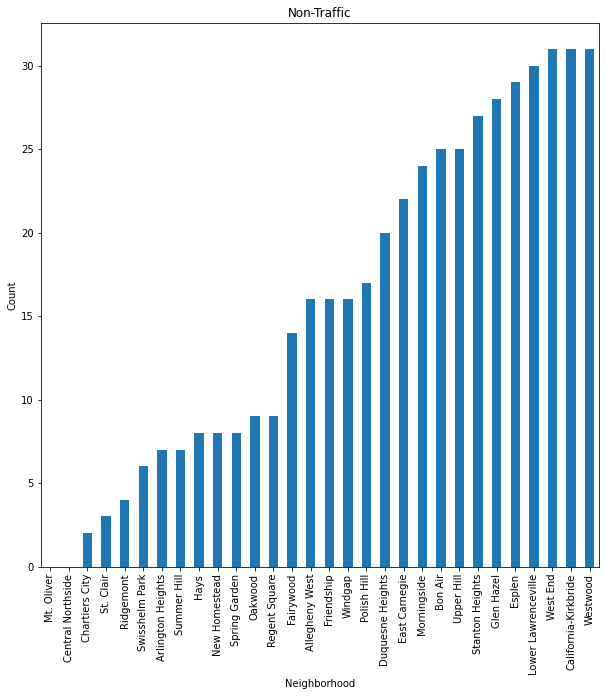

In [13]:
df.iloc[:30].plot(kind="bar", legend=None, figsize = (10, 10))
plt.title("Non-Traffic")
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.show()

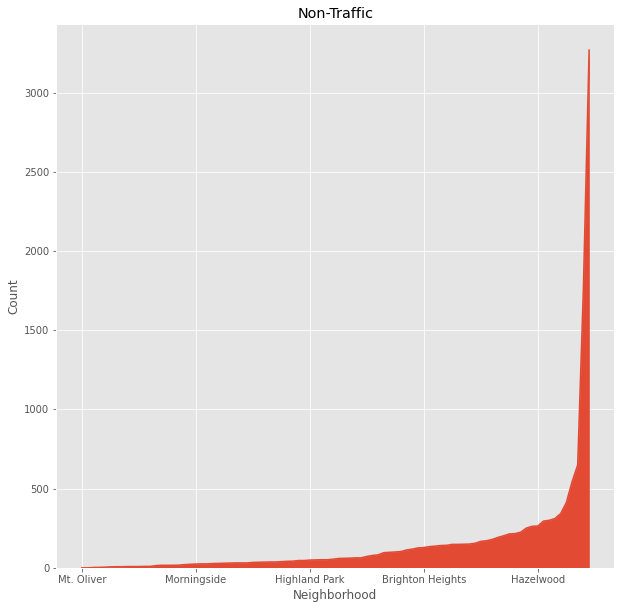

In [40]:
df.plot(kind="area", legend=None, figsize = (10, 10))
plt.title("Non-Traffic")
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.show()

Presented below is a map of Pittsburgh's neighborhoods, which reveals that the central region (comprising both yellow and green areas) exhibits the highest rate of non-traffic citations

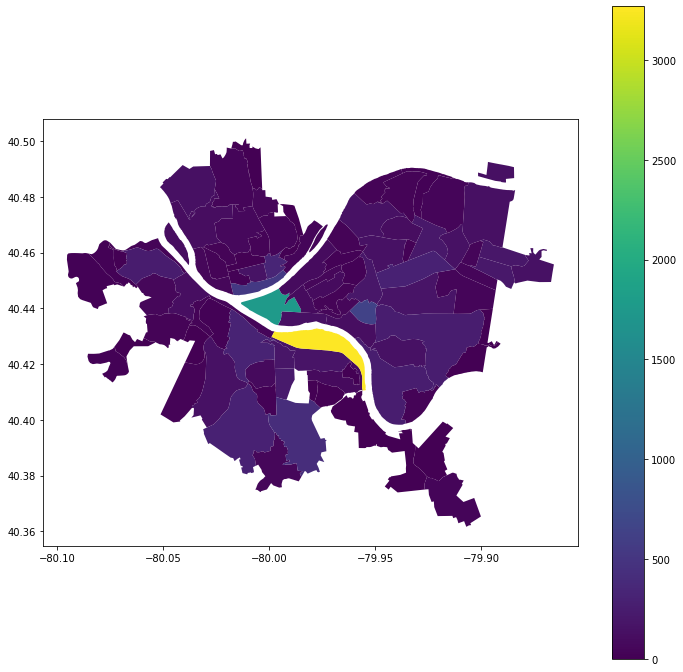

In [19]:
neighborhood["Traffic"] = dic.values()
neighborhood.plot(column = "Traffic", legend = True, figsize = (12, 12))

# Fire Inscedents
#### Fire Inscedent data around neighborhoods in Allegheny county

Fire incidents are a serious concern in any community, as they can result in significant property damage, injury, or loss of life. In Pittsburgh, fire incidents occur on a regular basis and can be caused by a variety of factors, including electrical malfunctions, cooking accidents, and intentional acts of arson. The Pittsburgh Bureau of Fire is responsible for responding to and managing fire incidents within the city limits. This includes extinguishing fires, conducting investigations to determine the cause of the fire, and providing support to those affected by the fire. The frequency and severity of fire incidents in Pittsburgh can have a significant impact on the safety and wellbeing of residents and businesses within the city. As such, efforts to prevent and respond to fire incidents are a critical component of ensuring the overall safety and resilience of the community.

In [20]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

** Load the dataset into a pandas DataFrame using the pandas

The dataset name is Fire Incidents in City of Pittsburgh**

In [21]:
# Import the data from Fire Incidents in City of Pittsbugh
df = pd.read_csv('https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02')
df.head()
# https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [22]:
# Check the data

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(9187, 18)
call_no                   object
incident_type            float64
type_description          object
address                   object
alarm_time                object
alarms                     int64
primary_unit              object
census_tract             float64
neighborhood              object
council_district         float64
ward                     float64
tract                    float64
public_works_division    float64
pli_division             float64
police_zone              float64
fire_zone                 object
latitude                 float64
longitude                float64
dtype: object
['incident_type' 'alarms' 'census_tract' 'council_district' 'ward' 'tract'
 'public_works_division' 'pli_division' 'police_zone' 'latitude'
 'longitude']
['call_no' 'type_description' 'address' 'alarm_time' 'primary_unit'
 'neighborhood' 'fire_zone']


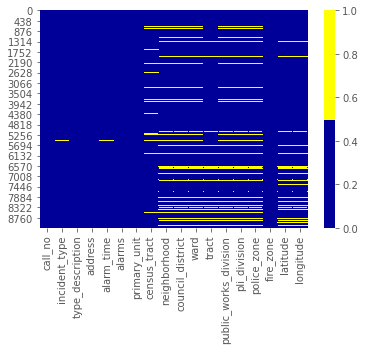

In [23]:
# Clean the dataset by removing any irrelevant or missing data.
# Check missing data: 

cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [24]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

call_no - 0%
incident_type - 0%
type_description - 0%
address - 0%
alarm_time - 0%
alarms - 0%
primary_unit - 0%
census_tract - 6%
neighborhood - 14%
council_district - 14%
ward - 14%
tract - 9%
public_works_division - 14%
pli_division - 14%
police_zone - 14%
fire_zone - 0%
latitude - 9%
longitude - 9%


In [25]:
# Use the groupby() function in pandas to group the data by neighborhood.

#print(df)
grouped = df.groupby('neighborhood')
grouped_muti = df.groupby(['neighborhood', 'alarms' , 'type_description'])
print(grouped.size())
print(grouped_muti.size())

neighborhood
Allegheny Center        61
Allegheny West          42
Allentown              122
Arlington               50
Arlington Heights       13
                      ... 
Upper Lawrenceville     50
West End                20
West Oakland            58
Westwood                26
Windgap                 20
Length: 91, dtype: int64
neighborhood      alarms  type_description                               
Allegheny Center  0       Brush or brush-and-grass mixture fire              6
                          Dumpster or other outside trash receptacle fire    5
                          Mobile property (vehicle) fire, Other              1
                          Natural vegetation fire, Other                     4
                          Outside equipment fire                             1
                                                                            ..
Windgap           0       Special outside fire, Other                        1
                  1       Building fir

In [26]:
# Count the number of fire incidents in each neighborhood using the count() function in pandas.
grouped_fire_df = df.groupby(['neighborhood'])['alarms'].count()
# Print the resulting dataframe
print(grouped_fire_df)

neighborhood
Allegheny Center        61
Allegheny West          42
Allentown              122
Arlington               50
Arlington Heights       13
                      ... 
Upper Lawrenceville     50
West End                20
West Oakland            58
Westwood                26
Windgap                 20
Name: alarms, Length: 91, dtype: int64


In [27]:
# Create a new DataFrame to store the total number of fire incidents in each neighborhood.
fire_neighborhood_df = pd.DataFrame({'neighborhood': grouped_fire_df.index, 'num_fire_incidents': grouped_fire_df.values})

print(fire_neighborhood_df)

           neighborhood  num_fire_incidents
0      Allegheny Center                  61
1        Allegheny West                  42
2             Allentown                 122
3             Arlington                  50
4     Arlington Heights                  13
..                  ...                 ...
86  Upper Lawrenceville                  50
87             West End                  20
88         West Oakland                  58
89             Westwood                  26
90              Windgap                  20

[91 rows x 2 columns]


In [28]:
# Merge this new DataFrame with the original dataset using the merge() function in pandas.

fires = df.merge(fire_neighborhood_df, on="neighborhood")
# Print the merged DataFrame

print(fires.head())

      call_no  incident_type        type_description  \
0  F170043431          131.0  Passenger vehicle fire   
1  F140015339          131.0  Passenger vehicle fire   
2  F140004033          111.0           Building fire   
3  F140008680          131.0  Passenger vehicle fire   
4  F150056424          131.0  Passenger vehicle fire   

                                            address           alarm_time  \
0        1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212  2017-05-31T08:39:47   
1  LAFAYETTE AVE & FEDERAL STR, PITTSBURGH PA 15212  2014-02-26T12:17:12   
2        2000 BLOCK LETSCHE ST, PITTSBURGH PA 15214  2014-01-12T15:38:37   
3        1700 BLOCK BELLEAU DR, PITTSBURGH PA 15214  2014-01-30T17:41:23   
4        1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212  2015-07-20T21:48:00   

   alarms primary_unit  census_tract neighborhood  council_district  ward  \
0       0      231EN38        2509.0     Fineview               6.0  25.0   
1       0      231EN38        2614.0     Fineview   

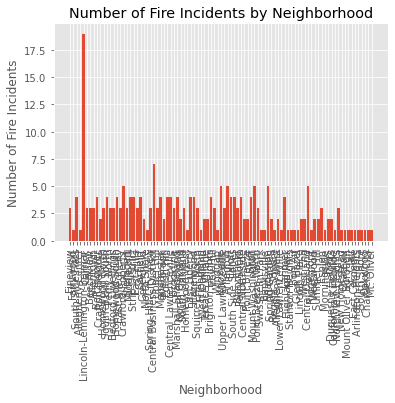

In [29]:
# Visualize the data using a bar chart or any other relevant plot to see the distribution of fire incidents across neighborhoods.

# create a bar chart of fire incidents by neighborhood
plt.bar(fires['neighborhood'], fires['alarms'])

# set the title and axis labels
plt.title('Number of Fire Incidents by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Fire Incidents')

# rotate x-axis labels for readability
plt.xticks(rotation=90)

# display the plot
plt.show()

Shown here is a map depicting the distribution of fire incident events across different neighborhoods. The areas marked in yellow indicate the highest occurrence rate of such incidents, while the green areas have comparatively lower rates

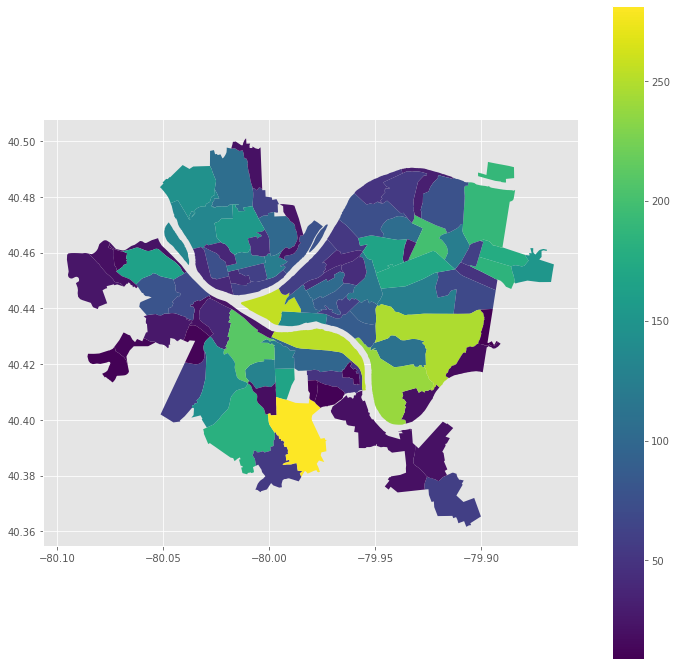

In [30]:
neighborhoods["Traffic"] = dic.values()


firesDic = {}

for i in neighborhoods["hood"]:
    firesDic[i] = 0
    
for index,row in df.iterrows():
    n = row['neighborhood']
    
    if n in firesDic:
        firesDic[n] += 1

neighborhoods["f"] = firesDic.values()
neighborhoods.plot(column = "f", legend = True, figsize = (12, 12))

We integrated all three datasets of arrests, fire incidents, and non-traffic citations. Presented below are the map, table, and bar chart illustrating the combined data

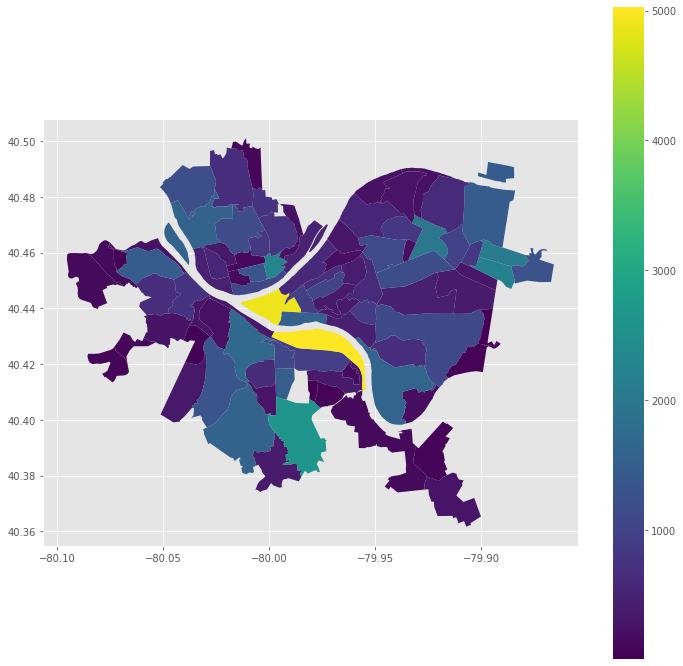

In [31]:
saftey = {}

for i in neighborhoods["hood"]:
    saftey[i] = 0
    
for index,row in df.iterrows():
    n = row['neighborhood']
    
    if n in saftey:
        saftey[n] += 0.8
for index,row in data.iterrows():
    neighborhood = row['NEIGHBORHOOD']
    
    if neighborhood in saftey:
        saftey[neighborhood] += 0.5
for index, row in arrests.iterrows():
    arrests_neighborhood =  row["INCIDENTNEIGHBORHOOD"]
    if arrests_neighborhood in saftey:
        saftey[arrests_neighborhood] += 1
neighborhoods["saftey"] = saftey.values()
neighborhoods.plot(column = "saftey", legend = True, figsize = (12, 12))

In [32]:
df = pd.DataFrame.from_dict(saftey, orient="index", columns = ["saftey"])
df = df.sort_values("saftey", ascending=True)
display(df)

,saftey
Mt. Oliver,8.8
Ridgemont,46.6
Regent Square,46.7
Chartiers City,53.0
Swisshelm Park,55.8
...,...
Homewood South,2205.0
East Allegheny,2295.4
Carrick,2633.3
Central Business District,4895.3


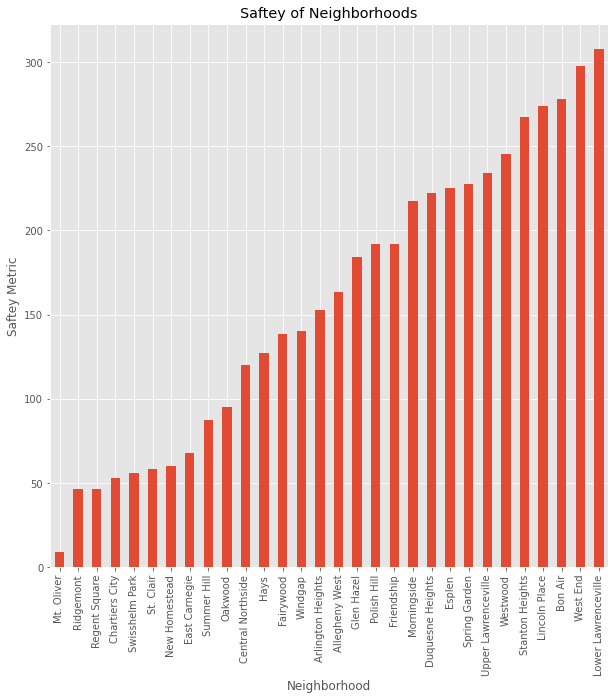

In [33]:
df.iloc[:30].plot(kind="bar", legend=None, figsize = (10, 10))
plt.title("Saftey of Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Saftey Metric")
plt.show()

# Best Neighborhood - Conclusion



### In conclusion, according to our saftey metric the best neighborhood in Allegheny County in Pittsburgh is Mt. Oliver
# Member: Ammar AI-Abboodi
### My data shows that the neighborhood with the lowest number of arrests is Mt. Oliver and in second place comes Central North Side. This aligns with the final conclusion that Mt. Oliver neighborhood is the safest in the City of Pittsburgh. I'm not surprised or unsurprised as I wasn't aware of many neighborhoods around the city of Pittsburgh beside my own.

# Member: Maggie Lin
### Allegheny West is my preferred neighborhood in Pittsburgh, but according to the available data, it may not be the safest option. In comparison to Mt. Oliver, which has been deemed the safest neighborhood in Pittsburgh, Allegheny West has a higher rate of non-traffic incidents, fire incidents, and arrests, which can be concerning for safety purposes.

# Member: Zipan Huang
### The results were unexpected, as I had initially thought that Shadyside would be the best neighborhood. However, the data graph indicates that Shadyside is not even in the top 10 best neighborhoods. Upon closer examination, it appears that the likelihood of fires may be influenced by factors such as population density, with fewer fires occurring in areas with lower populations.